In [1]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling
import requests 
%matplotlib inline

In [2]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [3]:
# getting a data dictionary in case you want to have it inside the notebook
# response = requests.get('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564407075&Signature=Iduf4UDvx2Cei5S9B7A%2B%2Fz3u%2Ff8GG0RxvpfMu5IHRtJOFBsjq806B2sSr6zucZBwJeBNSOuIpOssfa4i%2BYS8ybrJgaHnA%2Fqkcox6ZsD8BLIl3yTHjwmfkie2ohGSI0bdZLiXblBWps8xJ8sGZPnmTegLYLhFgrA7O0BEF5dIXrFVYufTcndkOeOyYm3fopGjTablaxWOUyhmd43WfOxADJInaMqUk37SBzVD4jD1bj%2F%2B%2FJkK7OeTvUIBJOR3EXij97rhVqcZNdxTttF91t0W3HFcqJrRhrw5%2BKvZmHNzsT5AO164QSjlFqT5kU3dZWoZqxdDOxImVvr%2Fw2m4IRZGCw%3D%3D')
# dict = response.text
# print(dict)

In [4]:
# train.describe().T
# test.describe().T

In [ ]:
# Distribution of SalePrice and mean 
sns.distplot(train['SalePrice'])
plt.axvline(train['SalePrice'].mean(), color="k", linestyle="--")

In [ ]:
#Extensive profiling of the dataset
pandas_profiling.ProfileReport(test)

### Dealing with missing values in obvious features

In [7]:
# columns to drop at all from both sets
dr = ['Alley','Fence','FireplaceQu','MiscFeature','PoolQC']
train.drop(labels = dr, axis = 1, inplace = True)
test.drop(labels = dr, axis = 1, inplace = True)

In [8]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
# train['Alley'].fillna('NA', inplace = True)
# train['FireplaceQu'].fillna('NA', inplace = True)
train['GarageQual'].fillna('NA', inplace = True)
train['GarageFinish'].fillna('NA', inplace = True)
train['GarageCond'].fillna('NA', inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['GarageType'].fillna('NA', inplace = True)
# train['PoolQC'].fillna('NA', inplace = True)
# train['Fence'].fillna('NA', inplace = True)
# train['MiscFeature'].fillna('NA', inplace = True)
train['MasVnrType'].fillna('None', inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
train['BsmtQual'].fillna('NA', inplace = True)
train['BsmtCond'].fillna('NA', inplace = True)
train['BsmtExposure'].fillna('NA', inplace = True)
train['BsmtFinType1'].fillna('NA', inplace = True)
train['BsmtFinType2'].fillna('NA', inplace = True)
train['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

# and for the test set

test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
# test['Alley'].fillna('NA', inplace = True)
# test['FireplaceQu'].fillna('NA', inplace = True)
test['GarageQual'].fillna('NA', inplace = True)
test['GarageFinish'].fillna('NA', inplace = True)
test['GarageCond'].fillna('NA', inplace = True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
test['GarageType'].fillna('NA', inplace = True)
# test['PoolQC'].fillna('NA', inplace = True)
# test['Fence'].fillna('NA', inplace = True)
# test['MiscFeature'].fillna('NA', inplace = True)
test['MasVnrType'].fillna('None', inplace = True)
test['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
test['BsmtQual'].fillna('NA', inplace = True)
test['BsmtCond'].fillna('NA', inplace = True)
test['BsmtExposure'].fillna('NA', inplace = True)
test['BsmtFinType1'].fillna('NA', inplace = True)
test['BsmtFinType2'].fillna('NA', inplace = True)
test['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class
# test needs further cleansing... Remove columns with lots of NaNs, like Alley from both datasets

In [56]:
# Let's look a column name, and a number of NaNs
# train.isna().sum()
#or 
# train.columns[train.isna().any()].tolist()
# test.columns[test.isna().any()].tolist()

[]

In [26]:
# dealing with those test columns from above
test['Utilities'].value_counts(normalize = True)

AllPub    1.0
Name: Utilities, dtype: float64

In [28]:
test['MSZoning'].fillna('RL', inplace = True)
test['Utilities'].dropna(inplace = True)
test['Exterior1st'].dropna(inplace = True)
test['Exterior2nd'].dropna(inplace = True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(), inplace = True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean(), inplace = True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean(), inplace = True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(), inplace = True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean(), inplace = True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean(), inplace = True)
test['KitchenQual'].dropna(inplace = True)
test['Functional'].dropna(inplace = True)
test['GarageCars'].fillna(round(float(test['GarageCars'].mean()),1), inplace = True)
test['GarageArea'].fillna(test['GarageArea'].mean(), inplace = True)
test['SaleType'].dropna(inplace = True)

In [53]:
test[test.isna().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [52]:
# test.drop(test.index[[95,45,485,756,1013,1029]], inplace = True)
# test.drop(test.index[[455,691]], inplace = True)
# test.drop(test.loc[test['Id']==1916].index, inplace = True)
# test.drop(test.loc[test['Id']==2152].index, inplace = True)

### Feature engineering part

#### Categorical are categorical; numeric are numeric

In [59]:
train['Id'] = train['Id'].astype('category') 
train['MSSubClass'] = train['MSSubClass'].astype('category')
# train['YearBuilt'] = train['YearBuilt'].astype('category')
# train['YrSold'] = train['YrSold'].astype('category')
# train['YearRemodAdd'] = train['YearRemodAdd'].astype('category')
train['MoSold'] = train['MoSold'].astype('category')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('category')
# train['Fence'] = train['Fence'].astype('category')
# train['MiscFeature'] = train['MiscFeature'].astype('category')
train['MiscVal'] = train['MiscVal'].astype('category')

In [ ]:
[col for col in train.columns.tolist() if train[col].dtype not in ['object']] 

#### Need to check cardinality in train and test sets and look at the outlies in columns to which it applies

In [ ]:
for col in train.columns:
    if train[col].dtype == "object":
        print("For column {} cardinality in Train minus cardinality in Test equals: {}".format(col, train[col].nunique()-test[col].nunique()))
# cardinality of train is always higher than that of test        

#### Exploring columns where cardinality in train and test sets isn't the same

In [62]:
# combining into one dataset in order to more conveniently compare unique values in these columns:
train_1 = train.copy()
train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test_1 = test.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)

In [63]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in train.columns:
     if train[col].dtype == "object" and (train[col].nunique()-test[col].nunique()) != 0:
        cols_list.append(col)
        

# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, hue='Status', kind='count', data=combo)
    plt.xticks(rotation=45)

In [ ]:
# Scatterplots: numeric columns vs. SalePrice in the train set 
# numeric columns
# digit_cols = list(train.select_dtypes(include=[np.number]).columns.values)
digit_cols = train.select_dtypes(include=['float64','int64']).columns.to_list()
# digit_cols = digit_cols[2:] # don't need the first two columns
# scatter plots: digit_cols vs. SalePrice

for cols in digit_cols:
    plt.figure()
    sns.scatterplot(x = cols, y = 'SalePrice', data = train)
    
# LotFrontage, LotArea, YearBuilt, TotalBsmtSF, GrLivArea, 1stFlrSF, 2ndFlrSF, GarageArea seem to have linear relationships

In [65]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

In [66]:
# turning object columns into category columns
for i in train.select_dtypes(include='object').columns.to_list():
    train[i] = train[i].astype('category')

In [67]:
# list w/ categorical variables
cater_cols = train.select_dtypes(include='category').columns.to_list()

In [ ]:
# categorical variables vs. SalePrice TAKES TIME
for cols in cater_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [ ]:
# Going back to columns with different cardinality cols_list
for cols in cols_list:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [70]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

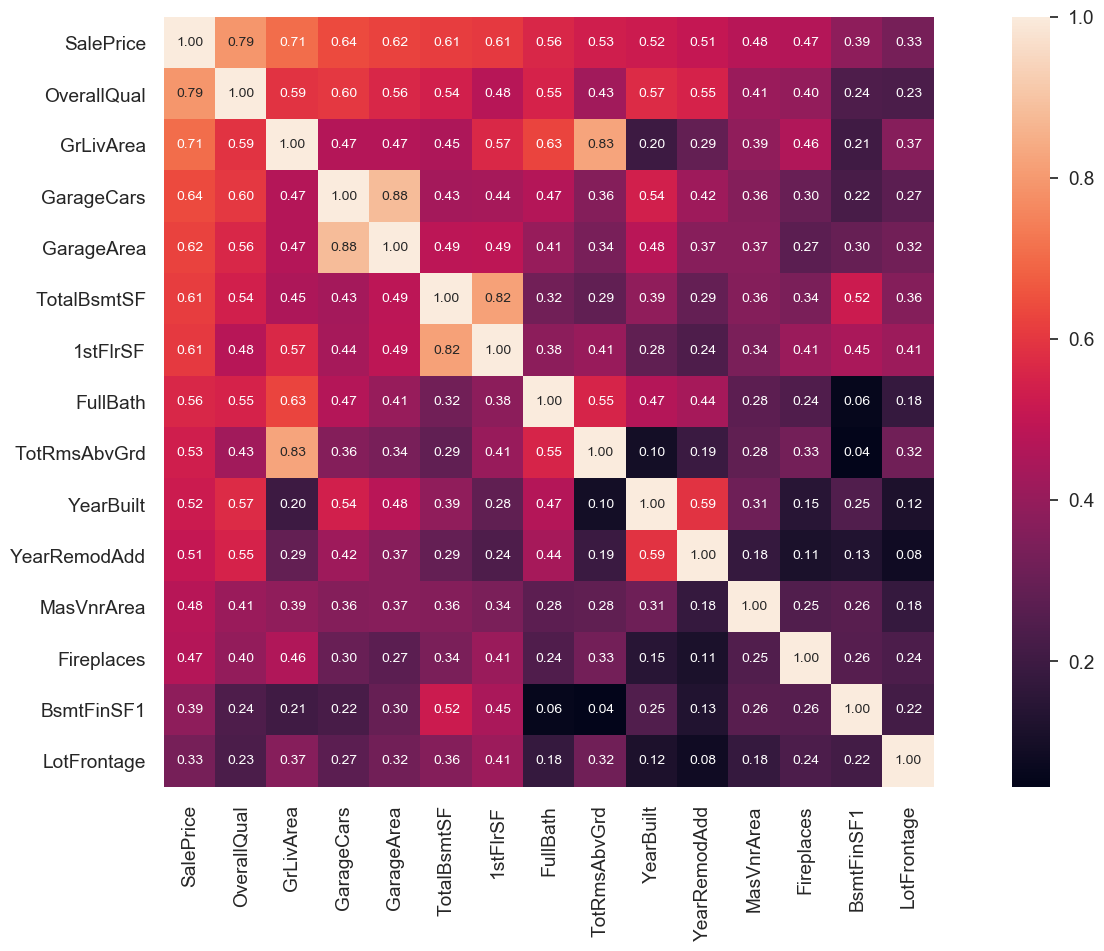

In [71]:
corrmat = train.corr()
plt.figure(figsize=(20,10))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# OverallQual, GrLivArea: Above grade (ground) living area square feet -- the strongest
#GarageCars and GarageArea is probably the same. Keeping only GarageCars because it's stronger
#TotalBsmtSF and 1stFlrSF are similar, keeping only TotalBsmntSF

In [ ]:
# Looking at these variables again
sns.distplot(train['GrLivArea'])
plt.axvline(train['GrLivArea'].mean(), color="k", linestyle="--")
plt.figure()
sns.distplot(train['TotalBsmtSF'])
plt.axvline(train['TotalBsmtSF'].mean(), color="k", linestyle="--")
plt.figure()
sns.distplot(train['1stFlrSF'])
plt.axvline(train['1stFlrSF'].mean(), color="k", linestyle="--")
#all look normal

In [73]:
plt.clf()
plt.close()

In [74]:
#and for the train set
train['Remodeled Y/N'] = np.where(train['YearRemodAdd'] ==train['YearBuilt'], 'No', 'Yes')
train['Age when Sold'] = train['YrSold'] - train['YearRemodAdd']
train['Remodeled Y/N'] = train['Remodeled Y/N'].astype('category')

In [ ]:
sns.boxplot(x ='Remodeled Y/N' , y = 'SalePrice', data = train)
plt.figure()
sns.scatterplot(x = 'Age when Sold', y = 'SalePrice', data = train)
# nothing crazy

In [76]:
#adding a new column totSqFt
#TotalBsmtSF + GrLivArea + 1stFlrSF
train['totSqFt'] = train['TotalBsmtSF'] + train['GrLivArea'] + train['1stFlrSF'] + train['2ndFlrSF']
# combo['totSqFt'] = combo['TotalBsmtSF'] + combo['GrLivArea']

In [77]:
#adding a new column totBath
# FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath
train['totBath'] = train['FullBath'] + 0.5*train['HalfBath'] + train['BsmtFullBath'] + 0.5*train['BsmtHalfBath']

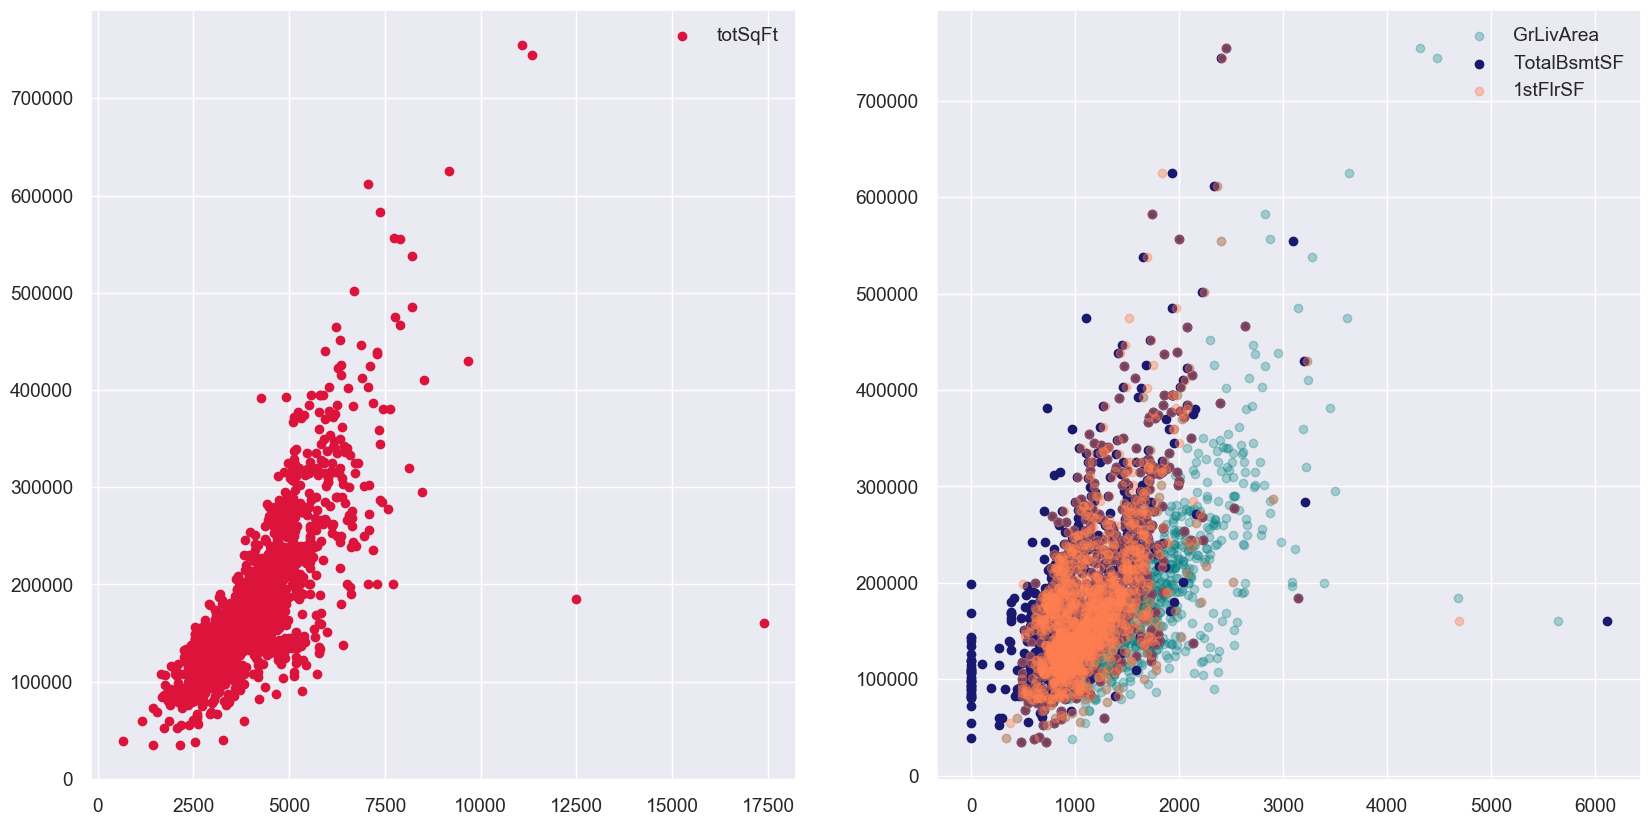

In [78]:
# Looking at how the new feature compares to old three 
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(train['totSqFt'],train['SalePrice'], color = 'crimson', label = 'totSqFt')

ax2.scatter(train['GrLivArea'],train['SalePrice'], color = 'teal', alpha = 0.3, label ='GrLivArea')
ax2.scatter(train['TotalBsmtSF'],train['SalePrice'], color = 'midnightblue', label = 'TotalBsmtSF')
ax2.scatter(train['1stFlrSF'],train['SalePrice'], color = 'coral', alpha = 0.4, label = '1stFlrSF')

ax1.legend()
ax2.legend()
plt.show()

In [79]:
# Remove variables that were used to create new features
cols_2_remove = ['GrLivArea','TotalBsmtSF','1stFlrSF','YearRemodAdd','YearBuilt','YrSold','Id','2ndFlrSF',
                'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','GarageYrBlt']
train_rem = train.copy()
train_rem.drop(cols_2_remove, axis = 1, inplace = True)


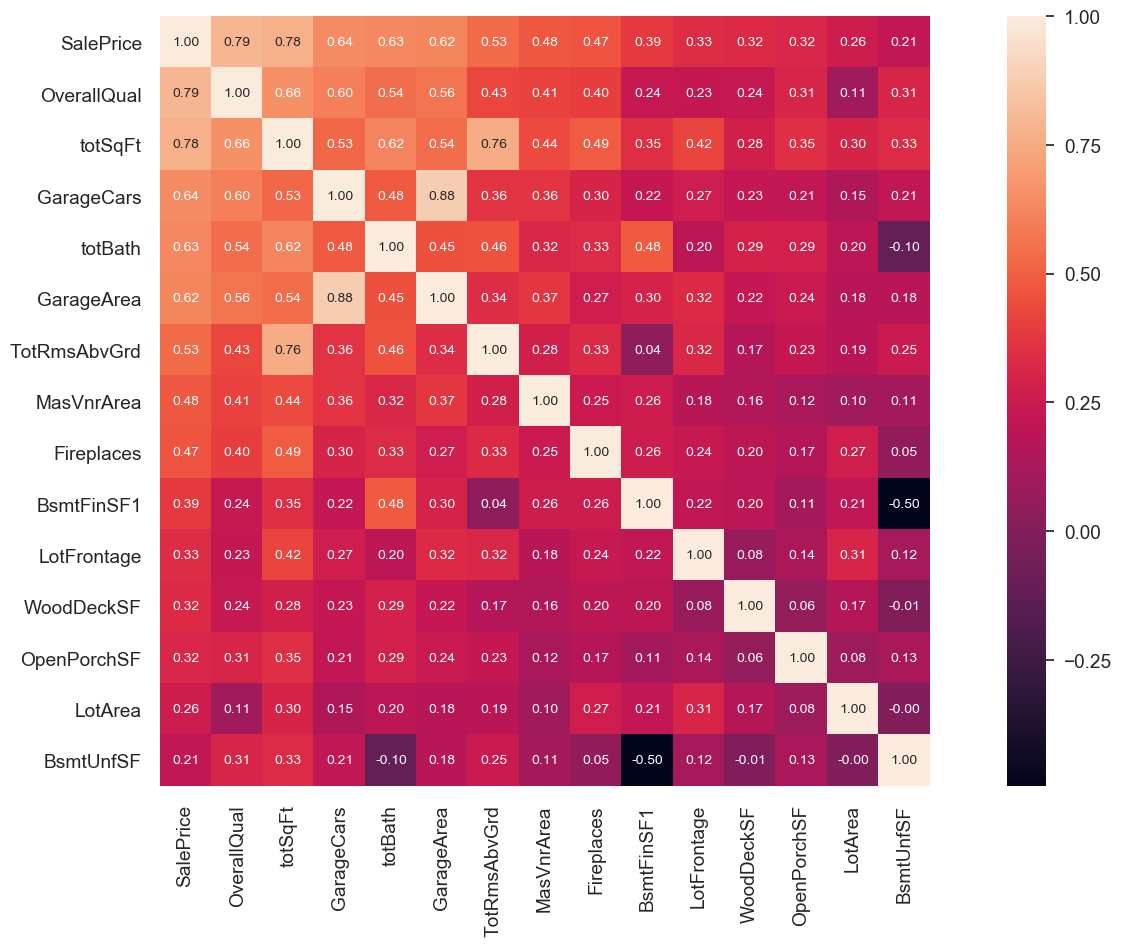

In [80]:
# rebuilding the correlation map for the new dataset
corrmat_rem = train_rem.corr()
plt.figure(figsize=(20,10))
k = 15 #number of variables for heatmap
cols = corrmat_rem.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_rem[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [81]:
# Remove features with the correlation coefficient below a certain threshold
corrmat_rem = train_rem.corr()
k=15
cols_min = corrmat_rem.nsmallest(k, 'SalePrice')['SalePrice']

In [82]:
# ix = train_rem.corr().sort_values('SalePrice', ascending=True).index
# # train_rem.loc[:, ix]
# ix


corr_matrix1 = train_rem.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=True))

In [83]:
# number of features that are not category and that can be correlated with SalePrice 
len(train_rem.select_dtypes(exclude='category').columns.to_list())

#features to remove
# BsmtFinSF2, 3SsnPorch

25

In [84]:
#features to remove based on their weak correlation with SalePrice
# BsmtFinSF2, 3SsnPorch
train_rem.drop(['BsmtFinSF2','3SsnPorch'], axis = 1, inplace= True)

In [85]:
# Remove houses that are very cheap and very expensive
# feature importance using random forest DO NOT DO AND EXPLAIN WHY IN THE ARTICLE
# move to ML. 
# Normalize values
# start modeling 

In [86]:
# Building normality plots
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [ ]:
qqplot(train_rem['SalePrice'], line='s')
pyplot.show()
# might be good to remove houses > 600K. Maybe do it later

In [ ]:
qqplot(train_rem['totSqFt'], line='s')
pyplot.show()

In [89]:
# checking outliers
# train_rem[train_rem['totSqFt']>10000]
# train_rem[train_rem['SalePrice']>700000]
# Seems that removing a house with totSqFt > 10000 is a good idea
train_rem.drop(train_rem[train_rem.totSqFt>10000].index, inplace = True)
# Same for SalePrice > 700000
train_rem.drop(train_rem[train_rem.SalePrice>700000].index, inplace = True)

In [ ]:
# Rebuilding normality plots
qqplot(train_rem['SalePrice'], line='s')
qqplot(train_rem['totSqFt'], line='s')

In [ ]:
# How SalePrice looks after log transformation
plt.hist(np.log(train_rem['SalePrice']))

### Encoding categorical features using dummy variables

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [93]:
# doing feature engineering on the test set

# turning object columns into category columns
for i in test.select_dtypes(include='object').columns.to_list():
    test[i] = train[i].astype('category')

test['Remodeled Y/N'] = np.where(test['YearRemodAdd'] ==test['YearBuilt'], 'No', 'Yes')
test['Age when Sold'] = test['YrSold'] - test['YearRemodAdd']

test['totSqFt'] = test['TotalBsmtSF'] + test['GrLivArea'] + test['1stFlrSF'] + test['2ndFlrSF']

test['totBath'] = test['FullBath'] + 0.5*test['HalfBath'] + test['BsmtFullBath'] + 0.5*test['BsmtHalfBath']

test['Remodeled Y/N']=test['Remodeled Y/N'].astype('category')

In [94]:
cols_2_remove = ['GrLivArea','TotalBsmtSF','1stFlrSF','YearRemodAdd','YearBuilt','YrSold','Id','2ndFlrSF',
                'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','BsmtFinSF2','3SsnPorch','GarageYrBlt']
test_rem = test.copy()
test_rem.drop(cols_2_remove, axis = 1, inplace = True)


In [95]:
sp = train_rem['SalePrice']

In [215]:
sp.head()

0    2.505338
1    2.493950
2    2.510994
3    2.472277
4    2.520050
Name: SalePrice, dtype: float64

In [96]:
#Add new column Status to both sets to differentiate between the two
train_1 = train_rem.copy()
train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test_1 = test_rem.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)

In [97]:
train_1.shape
test_1.shape
combo.shape

(2903, 65)

In [98]:
# extra checks
list(set(combo.columns.to_list()) ^ set(train_rem.columns.to_list()))

['Status', 'SalePrice']

In [99]:
X = combo.copy()
St = X['Status']
X.drop('Status', axis = 1, inplace = True)

In [100]:
combo['Status'].value_counts()
St.value_counts()

Train Set    1456
Test Set     1447
Name: Status, dtype: int64

In [101]:
X_cat = X.select_dtypes(include=['category'])
X_num = X.select_dtypes(exclude=['category'])

In [102]:
X_encoded = pd.get_dummies(X_cat)

In [103]:
print("X_encoded = {}\nX_num = {}\nSt = {}".format(X_encoded.shape,X_num.shape, St.shape))

X_encoded = (2903, 245)
X_num = (2903, 25)
St = (2903,)


In [104]:
frames = [X_encoded, X_num, St]
combo_enc = pd.concat(frames, axis = 1)

In [105]:
print('Combined set is {}'.format(combo_enc.shape))

Combined set is (2903, 271)


In [106]:
train_enc = combo_enc.loc[combo_enc['Status']=='Train Set']
test_enc = combo_enc.loc[combo_enc['Status']=='Test Set']

In [107]:
print('Encoded Train set is {}\nEncoded Test set is {}'.format(train_enc.shape,test_enc.shape))

Encoded Train set is (1456, 271)
Encoded Test set is (1447, 271)


In [167]:
# doing np.log on SalePrice
sp = np.log(sp)
# adding SalePrice to Encoded Train set
fr = [train_enc, sp]
train_enc = pd.concat(fr, axis = 1)

In [109]:
print('New shape of train_enc is {}'.format(train_enc.shape))

New shape of train_enc is (1456, 272)


#### Frequency encoding. Added later, not covered in the article

In [110]:
X_cat_freq = X_cat.copy()

In [111]:
#X_cat_freq.shape
# X_num.shape
# St.shape

In [113]:
for c in X_cat_freq.columns.to_list():
    X_cat_freq[c] = X_cat_freq.groupby(c).transform('count')/len(X_cat_freq[c])

In [114]:
frames_freq = [X_cat_freq, X_num, St]
combo_enc_freq = pd.concat(frames_freq, axis = 1)

In [151]:
combo_enc_freq.shape
# All features and Status are together

(2903, 65)

In [168]:
#cut combo_enc_freq by Train and Test. Add SalePrice back to the Train portion
train_freq = combo_enc_freq.loc[combo_enc_freq['Status']=='Train Set']
test_freq = combo_enc_freq.loc[combo_enc_freq['Status']=='Test Set']

# adding SalePrice to Encoded Train set
fr = [train_freq, sp]
train_freq = pd.concat(fr, axis = 1)

In [170]:
# Checking sizes 
# train_freq.shape
# test_freq.shape
# sp.shape

# train_freq.head(3)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age when Sold,totSqFt,totBath,Status,SalePrice
0,0.788839,0.995866,0.634172,0.898381,0.999311,0.721323,0.946607,0.102997,0.86290,0.99001,...,0,0,0,0,2,5,4276.0,3.5,Train Set,2.505338
1,0.788839,0.995866,0.634172,0.898381,0.999311,0.032380,0.946607,0.007578,0.05546,0.99001,...,0,0,0,0,5,31,3786.0,2.5,Train Set,2.493950
2,0.788839,0.995866,0.331381,0.898381,0.999311,0.721323,0.946607,0.102997,0.86290,0.99001,...,0,0,0,0,9,6,4492.0,3.5,Train Set,2.510994


In [228]:
features_freq = train_freq.drop(['SalePrice','Status'], axis = 1)
result_freq = np.exp(train_freq['SalePrice'])

X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(features_freq, result_freq, test_size = 0.2, random_state = 12)

In [ ]:
sns.distplot(train_enc['SalePrice'])
plt.axvline(train_enc['SalePrice'].mean(), color="k", linestyle="--")

In [ ]:
qqplot(train_enc['SalePrice'], line='s')

In [118]:
features = train_enc.drop(['SalePrice','Status'], axis = 1)
result = train_enc['SalePrice']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.2, random_state = 12)

# Machine Learning part

### Base case with a regression

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
lg = LinearRegression()
lg.fit(X_train, y_train)
prediction_1 = lg.predict(X_test)

In [124]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [125]:
# r2_score(y_test, prediction_1)
# mean_squared_error(y_test, prediction_1)
# in absolute numbers
print("Mean error in $ is {:.2}".
      format(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(prediction_1)))))


Mean error in $ is 2.1e+05


### Regression and lasso

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(np.exp(y_test), np.exp(prediction_1))
ax.plot([np.exp(y_test.min()), np.exp(y_test.max())], [np.exp(y_test.min()), np.exp(y_test.max())], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [127]:
print("For the test set, the mean squared error is {}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_test, prediction_1)),
                                                                           r2_score(y_test, prediction_1)))
# print("For the train set, the mean squared error is {}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_train,prediction_1)),
#                                                                              r2_score(y_train, prediction_1)))


For the test set, the mean squared error is 5851427675407.149, and R2 is -22172289237943128542509268992.00%


In [128]:
from sklearn.linear_model import Lasso

In [129]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test)
print("After lasso, for the test set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_test,pred_test_lasso)), r2_score(y_test, pred_test_lasso)))
print("After lasso, for the train set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_train,pred_train_lasso)), r2_score(y_train, pred_train_lasso)))

After lasso, for the test set, the mean squared error is 757.9551906051954, and R2 is -372026433.29%
After lasso, for the train set, the mean squared error is 0.11272637221338191, and R2 is 91.89%


In [131]:
# GridSearch for lasso parameters
# Should be done on the whole dataset before the train and test split
from sklearn.model_selection import GridSearchCV

In [132]:
alp = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
max_i = [1000, 1500, 2000, 2500]
param_grid = dict(alpha = alp, max_iter = max_i)
gsc = GridSearchCV(
    estimator = Lasso(),
    param_grid = param_grid)
result_gsc = gsc.fit(features, result)

print("Best score: %f using %s" % (result_gsc.best_score_, result_gsc.best_params_))
means = result_gsc.cv_results_['mean_test_score']
stds = result_gsc.cv_results_['std_test_score']
params = result_gsc.cv_results_['params']

C:\Users\us61565\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best score: 0.871235 using {'alpha': 0.01, 'max_iter': 1000}


In [133]:
# cross-validation
# lasso and another cross-validation. GridSearch for lasso and another cross-validation

In [134]:
from sklearn.model_selection import cross_validate

In [135]:
sc = cross_validate(lg, X_train, y_train, scoring='r2', cv=3, return_train_score = True)   
print("R2 Scores are {}\nIts mean is {}".format(sc['test_score'],sc['test_score'].mean()))

R2 Scores are [-1.05857741e+25 -1.37296046e+26 -1.95606697e+25]
Its mean is -5.581416338629196e+25


In [136]:
sc = cross_validate(lg, X_train, y_train, scoring='explained_variance', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

-5.547800677228927e+25


In [137]:
sc = cross_validate(lg, X_train, y_train, scoring='max_error', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

-35708196387816.09


#### Linear regression and XGBoost with the dataset encoded using Frequency Encoding

In [196]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
import math

In [229]:
regr_freq = LinearRegression()

In [230]:
regr_freq.fit(X_train_freq, y_train_freq)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [250]:
print("RMSE is: {:.2f}\nR_squared is {:.2f}%".format(math.sqrt(np.mean((regr_freq.predict(X_test_freq) - y_test_freq) ** 2)),
                                                   regr_freq.score(X_test_freq,y_test_freq)*100))

RMSE is: 0.12
R_squared is 90.81%


In [233]:
xgb_freq = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [234]:
xgb_freq.fit(X_train_freq,y_train_freq)
predictions_xgb_freq = xgb_freq.predict(X_test_freq)
print(explained_variance_score(predictions_xgb_freq,y_test_freq))

C:\Users\us61565\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:28:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9009430128151965


#### GridSearch for XGBoost

In [ ]:
# TAKES TIME
n_estimators = [80, 100, 120, 140, 160]
max_depth = [4, 5, 6, 7, 8, 9, 10]
learning_rate = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.04]
param_grid = dict(max_depth = max_depth, n_estimators = n_estimators, learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 10)
grid_search_xg_freq = GridSearchCV(xgb_freq, param_grid, scoring = 'r2', n_jobs = -1, cv=kfold, verbose = 1)
result_gcv_xgb_freq = grid_search_xg_freq.fit(X_train_freq, y_train_freq.astype(int))

In [240]:
print("Best score: %f using %s" % (result_gcv_xgb_freq.best_score_, result_gcv_xgb_freq.best_params_))
means = result_gcv_xgb_freq.cv_results_['mean_test_score']
stds = result_gcv_xgb_freq.cv_results_['std_test_score']
params = result_gcv_xgb_freq.cv_results_['params']

Best score: 0.754815 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120}


In [252]:
# Rebuilding using the best parameters:
xgb_freq = xgb.XGBRegressor(n_estimators=110, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)

xgb_freq.fit(X_train_freq,y_train_freq)
predictions_xgb_freq = xgb_freq.predict(X_test_freq)
print("R squared is {}".format(explained_variance_score(predictions_xgb_freq,y_test_freq)))

C:\Users\us61565\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:46:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R squared is 0.8924450196357799


#### Lasso on the frequency dataset

In [253]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_freq, y_train_freq)

pred_train_lasso_freq= model_lasso.predict(X_train_freq)
pred_test_lasso_freq= model_lasso.predict(X_test_freq)
print("After lasso, for the test set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_test_freq,pred_test_lasso_freq)), r2_score(y_test_freq, pred_test_lasso_freq)))
print("After lasso, for the train set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_train_freq,pred_train_lasso_freq)), r2_score(y_train_freq, pred_train_lasso_freq)))

After lasso, for the test set, the mean squared error is 0.13133096298024433, and R2 is 88.83%
After lasso, for the train set, the mean squared error is 0.14006568673657988, and R2 is 87.48%
